In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_virus_proteomes = "./VMR_MSL38_v2_segmen_protein_peptide_region_info.csv"
df_virus_proteomes = pd.read_csv(file_virus_proteomes)

In [5]:
df_virus_proteomes

,Sort,Species,Genome composition,segment_count,coding_segment_count,protein_number,protein_residue_number,predicted_protein_number,predicted_protein_residue_number,peptide_number,peptide_residue_number,region_number,region_residue_number
0,12760,Ichnoviriform fumiferanae,dsDNA,105,74,103,20755,103,20755,0,0,0,0
1,12759,Ichnoviriform fugitivi,dsDNA,56,55,143,26717,143,26717,0,0,0,0
2,12723,Bracoviriform congregatae,dsDNA,30,29,155,42830,155,42830,0,0,0,0
3,12729,Bracoviriform facetosae,dsDNA,29,7,109,22892,109,22892,0,0,0,0
4,12737,Bracoviriform indiense,dsDNA,27,6,27,7804,27,7804,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,8906,Ephemerovirus febris,ssRNA(-),1,1,12,4809,11,2665,0,0,3,1970
4403,8907,Ephemerovirus guangdong,ssRNA(-),1,1,10,4700,9,2584,0,0,3,1924
4404,8908,Ephemerovirus hayes,ssRNA(-),1,1,10,4775,9,2670,0,0,3,1963
4405,8909,Ephemerovirus henan,ssRNA(-),1,1,10,4693,9,2564,0,0,3,1951


In [6]:
file_meta = "~/2_protein_structure_prediction/virosphere-fold-v1_predicted_dataset.csv"
df_meta = pd.read_csv(file_meta)

In [7]:
df_meta_ictv = df_meta[['Sort', 'Realm', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']].drop_duplicates(['Sort'])

In [8]:
df_virus_proteomes['Realm'] = df_virus_proteomes['Sort'].map(df_meta_ictv.set_index('Sort')['Realm'])

In [9]:
# replace the NaN values with 'Unclassified' in the 'Phylum' column
df_virus_proteomes['Realm'].fillna('Unclassified', inplace=True)

In [10]:
df_virus_proteomes

,Sort,Species,Genome composition,segment_count,coding_segment_count,protein_number,protein_residue_number,predicted_protein_number,predicted_protein_residue_number,peptide_number,peptide_residue_number,region_number,region_residue_number,Realm
0,12760,Ichnoviriform fumiferanae,dsDNA,105,74,103,20755,103,20755,0,0,0,0,Unclassified
1,12759,Ichnoviriform fugitivi,dsDNA,56,55,143,26717,143,26717,0,0,0,0,Unclassified
2,12723,Bracoviriform congregatae,dsDNA,30,29,155,42830,155,42830,0,0,0,0,Unclassified
3,12729,Bracoviriform facetosae,dsDNA,29,7,109,22892,109,22892,0,0,0,0,Unclassified
4,12737,Bracoviriform indiense,dsDNA,27,6,27,7804,27,7804,0,0,0,0,Unclassified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,8906,Ephemerovirus febris,ssRNA(-),1,1,12,4809,11,2665,0,0,3,1970,Riboviria
4403,8907,Ephemerovirus guangdong,ssRNA(-),1,1,10,4700,9,2584,0,0,3,1924,Riboviria
4404,8908,Ephemerovirus hayes,ssRNA(-),1,1,10,4775,9,2670,0,0,3,1963,Riboviria
4405,8909,Ephemerovirus henan,ssRNA(-),1,1,10,4693,9,2564,0,0,3,1951,Riboviria


In [11]:
# make a count dataframe for the 'Realm' column
df_realm_protein = df_virus_proteomes['Realm'].value_counts().reset_index().sort_values('Realm')

In [12]:
df_realm_protein.columns = ['Realm', 'isolate_number']

In [13]:
# merge the two dataframes on the 'Realm' column
df_realm_protein = df_realm_protein.merge(df_virus_proteomes.groupby('Realm')['protein_number'].sum().reset_index(), on='Realm')
df_realm_protein = df_realm_protein.merge(df_virus_proteomes.groupby('Realm')['protein_residue_number'].sum().reset_index(), on='Realm')

In [14]:
df_realm_protein.sort_values('isolate_number', ascending=False, inplace=True)

In [15]:
df_realm_protein

,Realm,isolate_number,protein_number,protein_residue_number
2,Riboviria,2475,8755,8506189
1,Monodnaviria,1080,4551,1629163
4,Unclassified,379,21196,6122174
5,Varidnaviria,327,25195,7717734
0,Duplodnaviria,132,11511,5235351
3,Ribozyviria,14,16,3170


<function matplotlib.pyplot.show(close=None, block=None)>

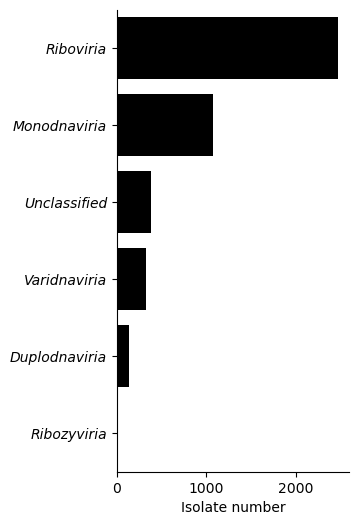

In [33]:
# change figure size
plt.figure(figsize=(3, 6))
sns.barplot(df_realm_protein, y="Realm", x="isolate_number", color="black", alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("")
plt.xlabel("Isolate number")
# make y-tick labels italic
plt.yticks(fontstyle='italic')
# save the figure
plt.savefig("./virus_proteome_isolate_number.svg", format="svg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

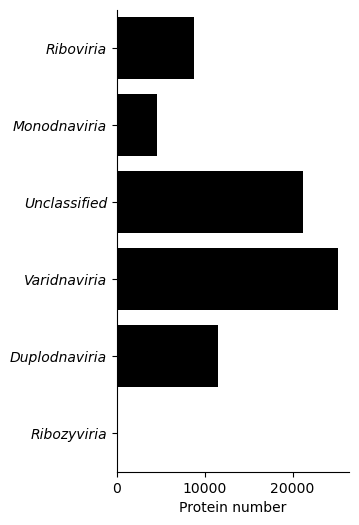

In [32]:
# change figure size
plt.figure(figsize=(3, 6))
sns.barplot(df_realm_protein, y="Realm", x="protein_number", color="black", alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("")
plt.xlabel("Protein number")
# make y-tick labels italic
plt.yticks(fontstyle='italic')
# save the figure
plt.savefig("./virus_proteome_protein_number.svg", format="svg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

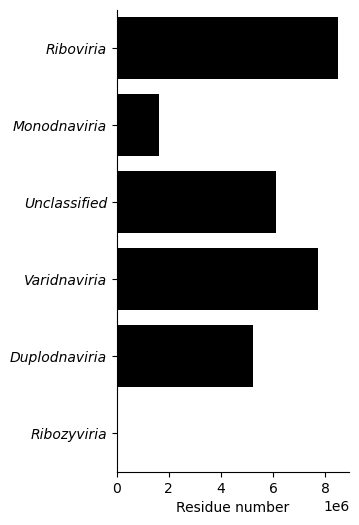

In [31]:
# change figure size
plt.figure(figsize=(3, 6))
sns.barplot(df_realm_protein, y="Realm", x="protein_residue_number", color="black", alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("")
plt.xlabel("Residue number")
# make y-tick labels italic
plt.yticks(fontstyle='italic')
# save the figure
plt.savefig("./virus_proteome_residue_number.svg", format="svg")
plt.show